## Time Series Analysis

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools     import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools     import adfuller
from pathlib                       import Path
from math import sqrt

In [7]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


### Load Data

In [8]:
path_dataset = path_root / 'dataset/HRB.csv'
HRB = pd.read_csv(path_dataset)
HRB.head()

,Quarter,Earnings
0,2007Q1,-0.36
1,2007Q2,-0.38
2,2007Q3,0.07
3,2007Q4,1.85
4,2008Q1,-0.34


### Autocorrelation function

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


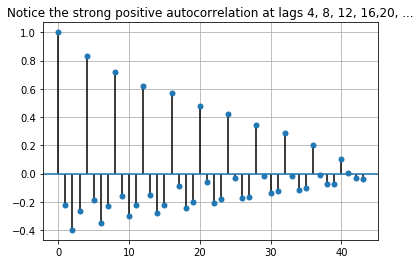

In [15]:
# Compute the acf array of HRB
acf_array = acf(HRB['Earnings'])
print(acf_array)

# Plot the acf function
plot_acf(HRB['Earnings'], alpha = 1)
plt.title('Notice the strong positive autocorrelation at lags 4, 8, 12, 16,20, ...')
plt.grid()
plt.show()

### Check confidence of autocorrelation
Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero. so the autocorrelation is not very significant.

In [25]:
MSFT = pd.read_csv('./dataset/MSFT.csv', index_col = 'Date' , parse_dates = True)
returns = MSFT.pct_change()
_ = returns.dropna(inplace = True, axis = 0)
returns.head()

,Adj Close
Date,
2012-08-07,0.010350
2012-08-08,0.002313
2012-08-09,0.005605
2012-08-10,-0.002623
2012-08-13,-0.000986


The approximate confidence interval is +/- 0.06


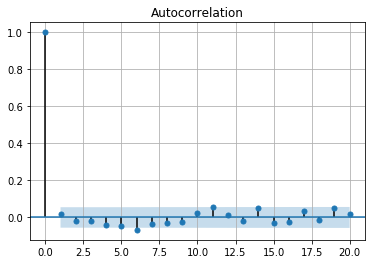

In [38]:
# Compute again the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)
# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.grid()
plt.show()

### White noise
Signal with $\mu = constant$, $\sigma^{2} = constant$, and autocorrelation equal to 0 at all lags. If the data have Gassian (normal) distribution, then we have *Gaussian White Noise*. Note that, returns of the stock market are pretty close to white noise process, therefore **the past will not help you forecast the future**.

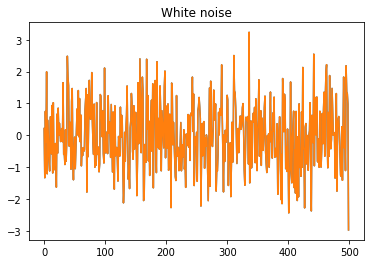

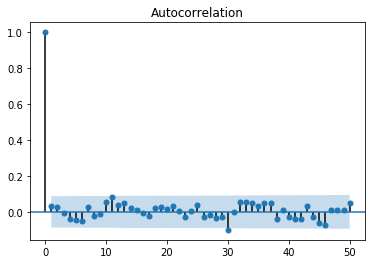

In [43]:
# simulate white noise series
mu    = 0 # mean
sigma = 1 # standard deviation
noise = np.random.normal(loc = mu, scale = sigma, size = 500)
plt.plot(noise)

plt.title('White noise')
plt.plot(noise)
plot_acf(noise, alpha=0.05, lags=50)
plt.show()

### Random walk
In general stock price $P$ follow a *random walk*, i.e., $P_{t} = P_{t-1} + \epsilon_{t}$, hence the change in price is white noise, i.e., $P_{t} - P_{t-1} = \epsilon_{t}$. Note that, **one cannot forcast a random walk**. *Random walk with drift* $P_{t} = \mu + P_{t-1} + \epsilon_{t}$ so the change in price is white noise with non-zero mean, in other words $P_{t} - P_{t-1} = \mu + \epsilon_{t}$ where $\mu$ can be seen as an *average return*. <br>
The **Dickey-Fuller** test if a series is a Random walk via reression test.

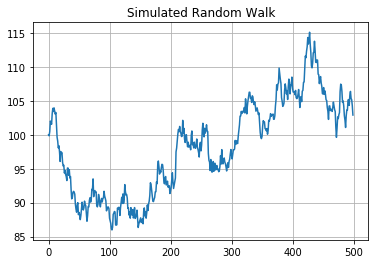

In [46]:
# RANDOM WALK
np.random.seed(seed = 42)
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)
# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0
# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)
# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.grid()
plt.show()

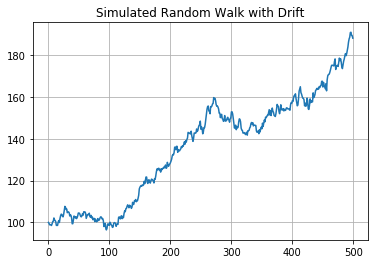

In [49]:
# Generate 500 random steps
# This simulated price series you plotted should closely resemble a random walk for a high flying stock
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1
# Set first element to 1
steps[0]=1
# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)
# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.grid()
plt.show()

### Are Stock Prices a Random Walk?
With the ADF test, the *null hypothesis* $H_{0}$ (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low **p-value** (say less than 5%) means we can reject the null hypothesis that the series is a random walk. <br>

In [53]:
AMZN = pd.read_csv('./dataset/AMZN.csv', index_col = 'Date' , parse_dates = True)
AMZN.head(3)
# Run the ADF test on the STOCK PRICES series and print out the results
results = adfuller(AMZN['Adj Close'])
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770742, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, we **cannot** reject the hypothesis that Amazon prices follow a random walk. However if we perform the test with **Stock returns**. We can easily reject the hypothesis that returns are a random walk at all levels of significance, sinze the **p-value** is extremely small,  

In [54]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()
# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()
# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.565589808348563e-22


### Stationarity

- **Strong stationarity**: entire distribution of data is time-invariant
- **Weak stationarity**: mean, variance and autocorrelation are time-invariant.

In general we sek for stationarity process becasue they are much easier to model. Random walk is a **non-stationary** series since the variacen grows with time. Seasonality series are also non-stationary since the mean increases over time. Note that, many non-stationary series can be made stationary due to transformation. For instance the time difference of a random walk is white noise which is a **stationary process**. 